# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Data

In [4]:
data = pd.read_csv('employee_attrition_train.csv')

In [11]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


In [12]:
data.shape

(1029, 35)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [15]:
data.isnull().sum()

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

# Data preprocessing

In [16]:
data = data.drop_duplicates()

In [18]:
# After droping duplicates
data.shape

(1029, 35)

In [38]:
data['Age'] = data['Age'].fillna(method='bfill')
data['DailyRate'] = data['DailyRate'].fillna(method='ffill')
data['BusinessTravel'] = data['BusinessTravel'].fillna(method='ffill')
data['DistanceFromHome'] = data['DistanceFromHome'].fillna(method='bfill')
data['MaritalStatus'] = data['MaritalStatus'].fillna(method='bfill')

In [39]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [25]:
object = []
for name, dtypes in data.dtypes.items():
    if dtypes == 'object':
        print(name)

Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
Over18
OverTime


In [32]:
label_encoder = LabelEncoder()

In [36]:
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data['BusinessTravel'] = label_encoder.fit_transform(data['BusinessTravel'])
data['Department'] = label_encoder.fit_transform(data['Department'])
data['EducationField'] = label_encoder.fit_transform(data['EducationField'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['JobRole'] = label_encoder.fit_transform(data['JobRole'])
data['MaritalStatus'] = label_encoder.fit_transform(data['MaritalStatus'])
data['Over18'] = label_encoder.fit_transform(data['Over18'])
data['OverTime'] = label_encoder.fit_transform(data['OverTime'])

In [37]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,0,2,1126.0,1,1.0,2,3,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,0,2,216.0,1,6.0,2,3,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,1,2,337.0,2,7.0,1,2,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,0,1,1246.0,0,7.0,3,3,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,0,2,994.0,1,7.0,4,1,1,1118,...,4,80,0,18,4,3,8,6,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,41.0,0,2,750.0,1,28.0,3,1,1,1596,...,4,80,2,10,3,2,10,9,6,8
1025,41.0,0,2,447.0,1,13.0,3,1,1,1814,...,1,80,0,11,3,1,3,2,1,2
1026,22.0,1,1,1256.0,1,13.0,4,1,1,1203,...,2,80,1,1,5,3,0,0,0,0
1027,29.0,0,2,1378.0,1,13.0,2,4,1,2053,...,1,80,1,10,2,3,4,3,0,3


# Data visulization

<Axes: xlabel='Age', ylabel='Count'>

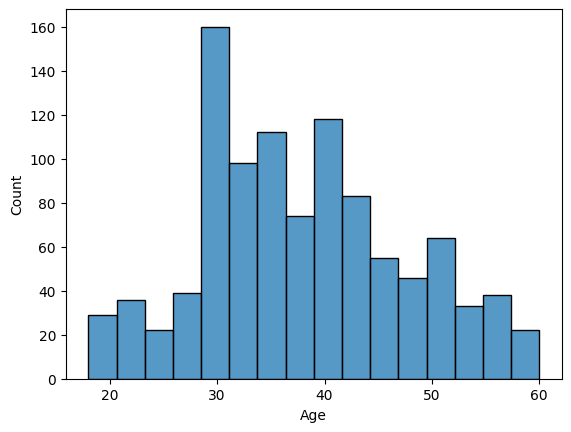

In [40]:
sns.histplot(data=data, x=data['Age'])

<Axes: xlabel='Attrition', ylabel='Count'>

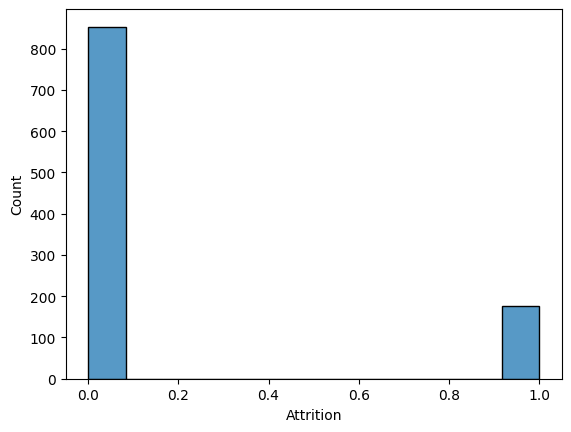

In [45]:
sns.histplot(data=data, x=data['Attrition'])

<Axes: xlabel='BusinessTravel', ylabel='Age'>

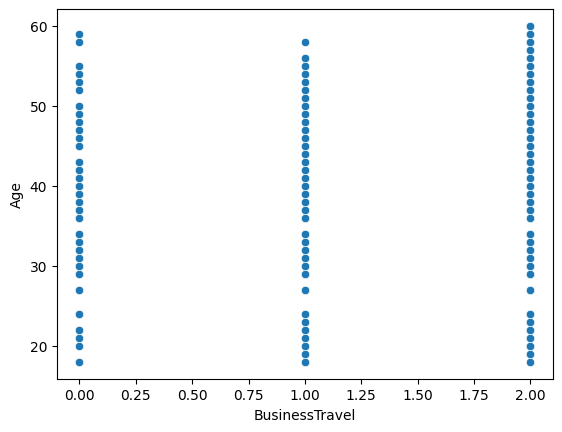

In [48]:
sns.scatterplot(data=data, x=data['BusinessTravel'], y=data['Age'])

<Axes: xlabel='Age', ylabel='DistanceFromHome'>

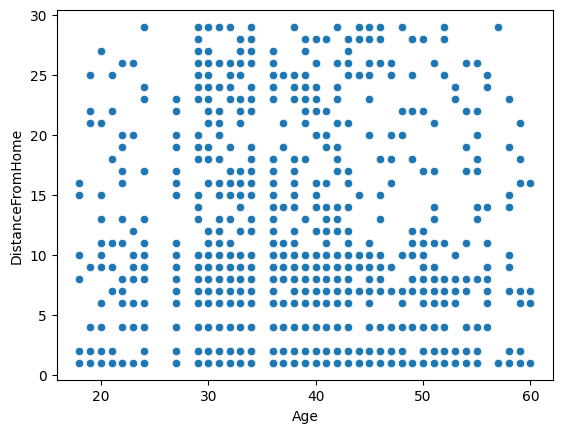

In [50]:
sns.scatterplot(data=data, x=data['Age'], y=data['DistanceFromHome'])

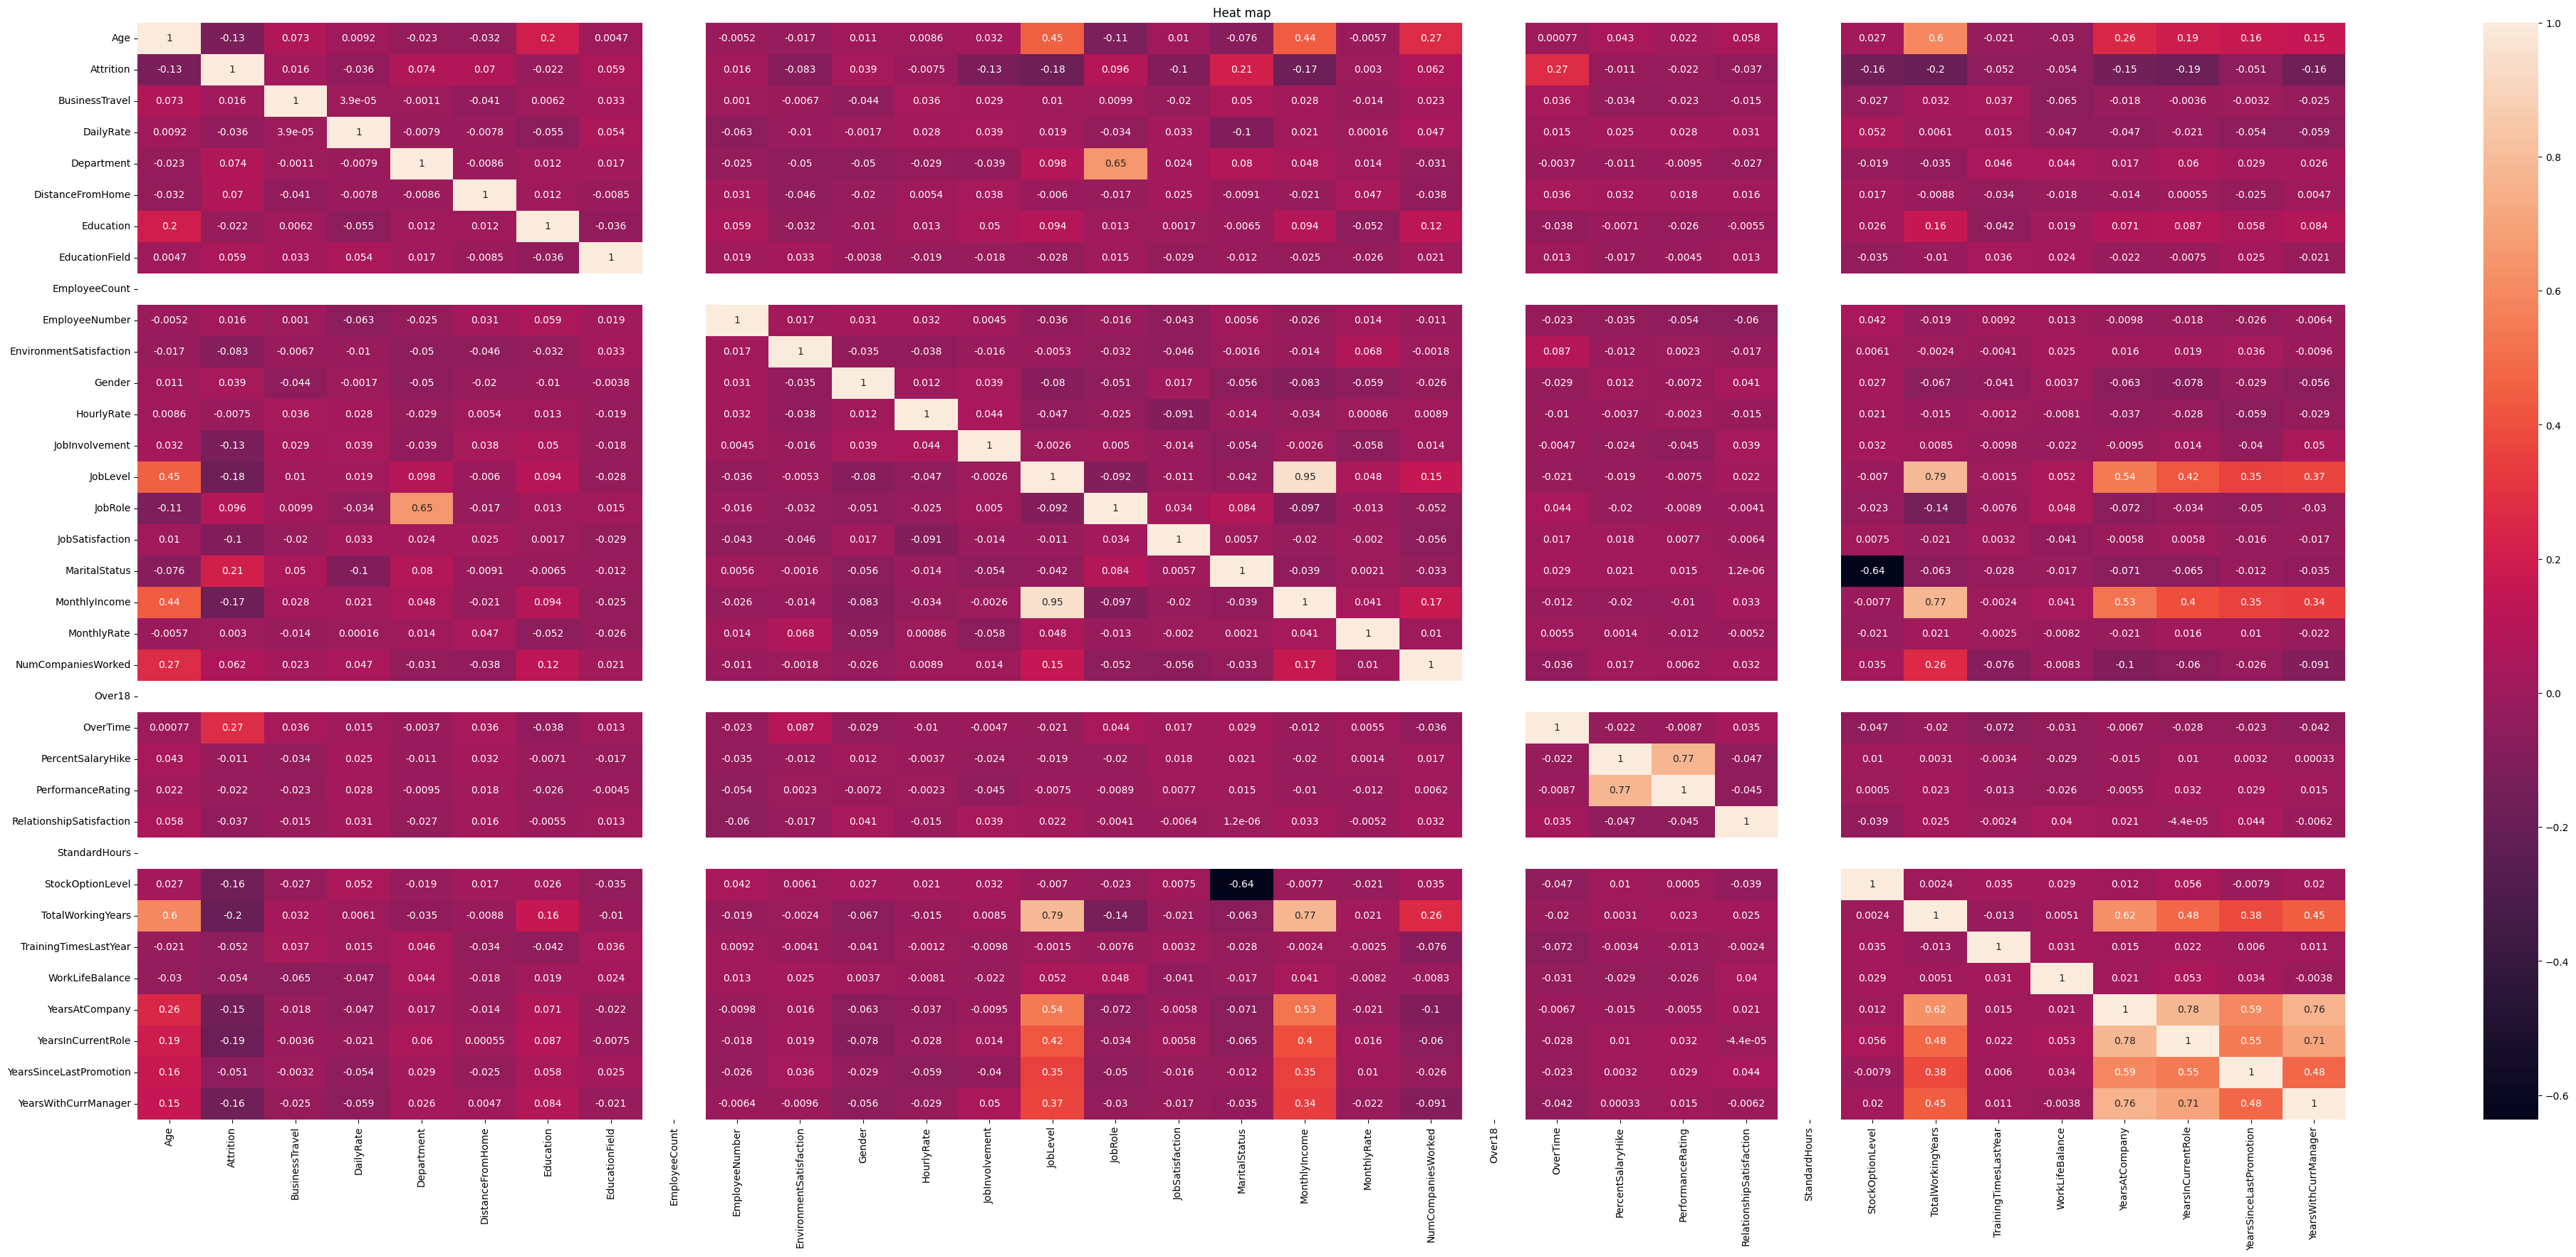

In [61]:
plt.figure(figsize=(50,20))
sns.heatmap(data.corr(), annot=True)
plt.title('Heat map')
plt.show()

# Data spliting

In [67]:
x = data.drop(['Attrition'], axis=1)
y = data['Attrition']

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [72]:
x_train.shape , x_test.shape, y_train.shape, y_test.shape

((720, 34), (309, 34), (720,), (309,))

# Model building

In [69]:
model = RandomForestClassifier()

In [73]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [74]:
model.score(x_test, y_test)

0.8478964401294499

# Testing phase

In [75]:
test_csv = pd.read_csv('employee_attrition_test.csv')

In [76]:
test_csv.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,...,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,...,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,...,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,...,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,...,4,80,0,16,3,4,13,11,3,7


In [92]:
test_csv.shape

(441, 34)

In [84]:
test_csv.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [79]:
test_csv['BusinessTravel'] = label_encoder.fit_transform(test_csv['BusinessTravel'])
test_csv['Department'] = label_encoder.fit_transform(test_csv['Department'])
test_csv['EducationField'] = label_encoder.fit_transform(test_csv['EducationField'])
test_csv['Gender'] = label_encoder.fit_transform(test_csv['Gender'])
test_csv['JobRole'] = label_encoder.fit_transform(test_csv['JobRole'])
test_csv['MaritalStatus'] = label_encoder.fit_transform(test_csv['MaritalStatus'])
test_csv['Over18'] = label_encoder.fit_transform(test_csv['Over18'])
test_csv['OverTime'] = label_encoder.fit_transform(test_csv['OverTime'])

In [83]:
test_csv['Age'] = test_csv['Age'].fillna(method='ffill')
test_csv['DailyRate'] = test_csv['DailyRate'].fillna(method='ffill')
test_csv['BusinessTravel'] = test_csv['BusinessTravel'].fillna(method='ffill')
test_csv['DistanceFromHome'] = test_csv['DistanceFromHome'].fillna(method='bfill')
test_csv['MaritalStatus'] = test_csv['MaritalStatus'].fillna(method='bfill')

In [85]:
test_csv.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,53.0,2,866.0,2,13.0,3,3,1,1469,4,...,4,80,0,6,4,3,5,4,1,3
1,53.0,2,1084.0,1,13.0,2,3,1,250,4,...,3,80,2,5,3,3,4,2,1,3
2,24.0,2,240.0,0,22.0,1,0,1,1714,4,...,3,80,1,1,2,3,1,0,0,0
3,45.0,2,1339.0,1,7.0,3,1,1,86,2,...,3,80,1,25,2,3,1,0,0,0
4,36.0,2,1396.0,1,14.0,2,1,1,304,4,...,4,80,0,16,3,4,13,11,3,7


# Inferencing

In [86]:
y_pred = model.predict(test_csv)

In [90]:
y_pred_1 = model.predict(x_test)

In [91]:
accuracy_score(y_pred_1, y_test)

0.8478964401294499

In [94]:
confusion_matrix(y_pred_1, y_test)

array([[250,  42],
       [  5,  12]], dtype=int64)

In [96]:
print(classification_report(y_pred_1, y_test))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91       292
           1       0.22      0.71      0.34        17

    accuracy                           0.85       309
   macro avg       0.60      0.78      0.63       309
weighted avg       0.94      0.85      0.88       309

